In [ ]:
!gdown 1uYthYdsdveWJD7dLSQbAPxiy1bVEXhX0

Downloading...
From: https://drive.google.com/uc?id=1uYthYdsdveWJD7dLSQbAPxiy1bVEXhX0
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 82.3MB/s]


In [ ]:
import pandas as pd
import numpy as np

read_file = pd.read_csv (r'/content/data_banknote_authentication.txt')
read_file.to_csv (r'/content/data_banknote_authentication.csv')
df = pd.read_csv("/content/data_banknote_authentication.csv")

df

,Unnamed: 0,3.6216,8.6661,-2.8073,-0.44699,0
0,0,4.54590,8.16740,-2.4586,-1.46210,0
1,1,3.86600,-2.63830,1.9242,0.10645,0
2,2,3.45660,9.52280,-4.0112,-3.59440,0
3,3,0.32924,-4.45520,4.5718,-0.98880,0
4,4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...,...
1366,1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
import csv
from sklearn.utils import shuffle
# field names
# fields = ['index', 'price1', 'price2', 'price3' , 'price4' , 'price5']
# importing python package
import pandas as pd
# read contents of csv file
file = pd.read_csv("/content/data_banknote_authentication.csv")
# adding header
headerList = ['index','price1', 'price2', 'price3' , 'price4' , 'price5']
# converting data frame to csv
file.to_csv("/content/data_banknote_authentication.csv",
            header=headerList, index=False)
# display modified csv file
file2 = pd.read_csv("/content/data_banknote_authentication.csv")
print('\nModified file:')
file2=shuffle(file2)
print(file2)



Modified file:
      index  price1  price2   price3   price4  price5
141     141  4.1736  3.3336 -1.42440  0.60429       0
360     360  3.3848  3.2674  0.90967  0.25128       0
579     579  4.7072  8.2957 -2.56050 -1.49050       0
1324   1324 -5.5250  6.3258  0.89768 -6.62410       1
276     276  1.3638 -4.7759  8.41820 -1.88360       0
...     ...     ...     ...      ...      ...     ...
1182   1182 -3.5741  3.9440 -0.07912 -2.12030       1
1280   1280 -2.7908 -5.7133  5.95300  0.45946       1
525     525  2.2091  7.4556 -1.32840 -3.30210       0
993     993 -0.8734  1.6533 -2.19640 -0.78061       1
790     790 -4.4779  7.3708 -0.31218 -6.77540       1

[1371 rows x 6 columns]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X = file2[["price1" ,"price2" , "price3" , "price4"]].values

y = file2[["price5"]].values
X ,y

(array([[ 4.1736 ,  3.3336 , -1.4244 ,  0.60429],
        [ 3.3848 ,  3.2674 ,  0.90967,  0.25128],
        [ 4.7072 ,  8.2957 , -2.5605 , -1.4905 ],
        ...,
        [ 2.2091 ,  7.4556 , -1.3284 , -3.3021 ],
        [-0.8734 ,  1.6533 , -2.1964 , -0.78061],
        [-4.4779 ,  7.3708 , -0.31218, -6.7754 ]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]]))

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape


((1096, 4), (275, 4), (1096, 1), (275, 1))

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
def logistic_regression(x , w):
  y_hat = sigmoid(x @ w)
  return y_hat

In [ ]:
y_hat = logistic_regression(np.random.rand(5 ,2) ,np.random.rand(2 , 1))
y_hat

array([[0.61764908],
       [0.68379239],
       [0.62538278],
       [0.60057463],
       [0.68055748]])

In [ ]:
def bce(y , y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

In [ ]:
bce(np.ones((5 , 1)) , y_hat)

0.44520769735417937

In [ ]:
def gradient(x , y  ,y_hat):
  grads = (x.T @(y_hat - y)) / len(y)
  return grads

In [ ]:
gradient(np.random.randn(5 , 2) , np.ones((5 , 1)) , y_hat)

array([[ 0.1237219 ],
       [-0.24295366]])

In [ ]:
def gradient_descent(w , eta , grads):
  w -= eta*grads
  return w

In [ ]:
def accuracy(y , y_hat):
  acc = np.sum(y==np.round(y_hat)) / len(y)
  return acc

In [ ]:
accuracy(np.array([1 , 0 , 1]) , np.array([0.7 , 0.5 , 0.3]))

0.6666666666666666

In [ ]:
x_train = np.hstack((np.ones((len(x_train) , 1)) , x_train))
x_train.shape

(1096, 5)

In [ ]:
m = 4
w = np.random.randn(m+1 , 1)
print(w.shape)
eta = 0.01
n_epochs = 2000

(5, 1)


In [ ]:
error_hist = []
for epoch in range(n_epochs):
  y_hat = logistic_regression(x_train , w)

  e = bce(y_train , y_hat)
  error_hist.append(e)
  grads = gradient(x_train , y_train , y_hat)
  w = gradient_descent(w , eta , grads)
  if(epoch + 1) % 100 == 0:
    print(f"Epoch = {epoch} , \t E = {e:.4} \t w={w.T[0]}")

Epoch = 99 , 	 E = 0.5404 	 w=[ 0.15234213 -1.28112397  0.16237587  0.00143421  1.33244236]
Epoch = 199 , 	 E = 0.36 	 w=[ 0.2465139  -1.42272792  0.01589293 -0.16007187  1.01684334]
Epoch = 299 , 	 E = 0.2669 	 w=[ 0.33357553 -1.48261684 -0.09322924 -0.28790364  0.78737991]
Epoch = 399 , 	 E = 0.2091 	 w=[ 0.41423081 -1.51163913 -0.18202775 -0.38361123  0.60580796]
Epoch = 499 , 	 E = 0.1706 	 w=[ 0.48792281 -1.52631278 -0.25710114 -0.4576243   0.45928313]
Epoch = 599 , 	 E = 0.1443 	 w=[ 0.55458412 -1.53351216 -0.32265264 -0.51700303  0.34171956]
Epoch = 699 , 	 E = 0.126 	 w=[ 0.61476632 -1.53678197 -0.38080048 -0.56628057  0.24816695]
Epoch = 799 , 	 E = 0.113 	 w=[ 0.6693823  -1.53818133 -0.43258678 -0.60839901  0.17374974]
Epoch = 899 , 	 E = 0.1034 	 w=[ 0.7193939  -1.53894662 -0.47873085 -0.64525379  0.11408423]
Epoch = 999 , 	 E = 0.0961 	 w=[ 0.765633   -1.53980306 -0.51990087 -0.67806925  0.06565681]
Epoch = 1099 , 	 E = 0.0904 	 w=[ 0.80875764 -1.54114935 -0.55674093 -0.707

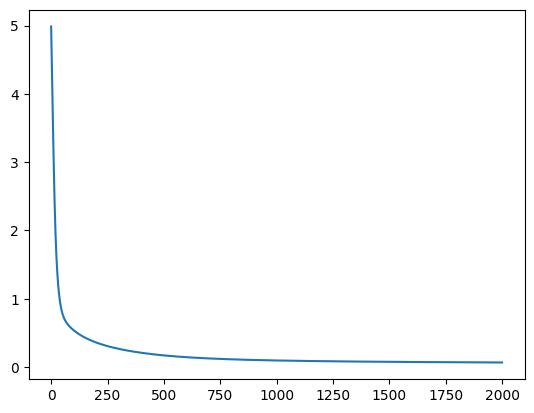

In [ ]:
plt.plot(error_hist)

In [ ]:
x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
x_test.shape

(275, 5)

In [ ]:
y_hat = logistic_regression(x_test , w)
accuracy(y_test , y_hat)

0.9854545454545455

In [ ]:
y_hat , y_test

(array([[8.43236428e-01],
        [9.29260173e-01],
        [8.58754919e-01],
        [9.15569214e-01],
        [8.99759663e-01],
        [3.83421469e-03],
        [6.73298160e-03],
        [8.32990442e-04],
        [9.94461484e-01],
        [8.62808167e-01],
        [9.90733459e-01],
        [3.86999775e-03],
        [9.02362937e-01],
        [1.32234088e-03],
        [1.32626591e-02],
        [6.37052286e-04],
        [1.34854746e-03],
        [4.10825903e-03],
        [9.26197651e-01],
        [9.87802877e-01],
        [1.59182414e-03],
        [9.67744267e-01],
        [2.55299055e-02],
        [6.91408080e-01],
        [9.88385146e-01],
        [9.41094178e-01],
        [6.45065149e-03],
        [9.93832097e-01],
        [8.72842913e-01],
        [6.81064044e-02],
        [9.46068666e-01],
        [1.11360063e-03],
        [1.63342664e-04],
        [9.93025455e-01],
        [1.57950545e-05],
        [1.12012913e-02],
        [9.74357886e-01],
        [9.59507276e-01],
        [2.0

<Axes: >

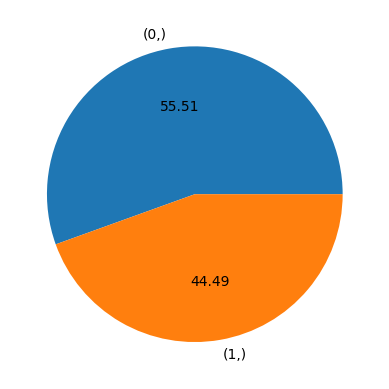

In [ ]:
#barresi taadol dade ha
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# value_count = y.value_counts()
# value_count
new_y = pd.DataFrame(y, columns=['Column_A'])
new_y.value_counts()
new_y.value_counts().plot.pie(autopct = "%.2f")

In [ ]:
# ! pip install -U imbalanced-learn

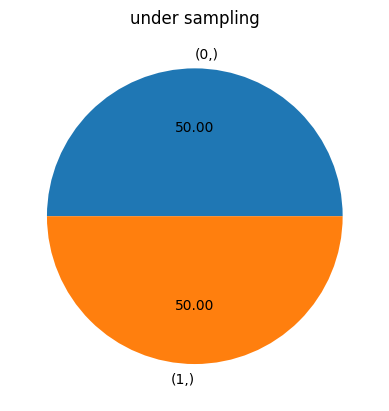

In [ ]:
#class balancing random undersampling
from imblearn.under_sampling import RandomUnderSampler
y = pd.DataFrame(y, columns=[''])
rus = RandomUnderSampler(sampling_strategy=1)
x_res_undersampling , y_res_undersampling = rus.fit_resample(X , y)
ax = y_res_undersampling.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("under sampling")


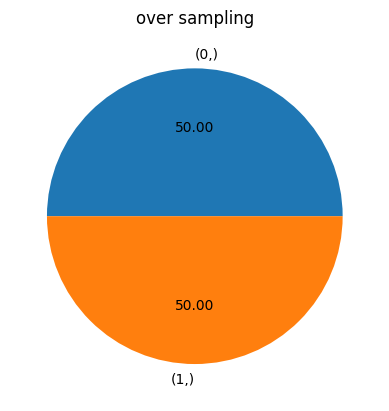

In [ ]:
#class balancing random oversampling
from imblearn.over_sampling import RandomOverSampler
y = pd.DataFrame(y, columns=[''])
rus = RandomOverSampler(sampling_strategy=1)
x_res_oversampling , y_res_oversampling = rus.fit_resample(X , y)
ax = y_res_oversampling.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("over sampling")

In [ ]:
# find maximum & minimum values of a list of columns
maxValues = file2[['price1', 'price2' , 'price3' , 'price4']].max()

print("Maximum value in column 'price1', 'price2' , 'price3' , 'price4': ")
print(maxValues)

minValues = file2[['price1', 'price2' , 'price3' , 'price4']].min()
print("Minimum value in column 'price1', 'price2' , 'price3' , 'price4': ")
print(minValues)

Maximum value in column 'price1', 'price2' , 'price3' , 'price4': 
price1     6.8248
price2    12.9516
price3    17.9274
price4     2.4495
dtype: float64
Minimum value in column 'price1', 'price2' , 'price3' , 'price4': 
price1    -7.0421
price2   -13.7731
price3    -5.2861
price4    -8.5482
dtype: float64


In [ ]:
#bakhshe 4 standard sazi ravesh 1
for i in range(4):
  file2[f'price{i+1}'] = (file2[f'price{i+1}']-minValues[i])/(maxValues[i]- minValues[i])
  print(file2[f'price{i+1}'])

141     0.808811
360     0.751927
579     0.847291
1324    0.109404
276     0.606185
          ...   
1182    0.250092
1280    0.306579
525     0.667143
993     0.444851
790     0.184915
Name: price1, Length: 1371, dtype: float64
141     0.640108
360     0.637631
579     0.825783
1324    0.752072
276     0.336662
          ...   
1182    0.662949
1280    0.301586
525     0.794348
993     0.577234
790     0.791174
Name: price2, Length: 1371, dtype: float64
141     0.166356
360     0.266904
579     0.117414
1324    0.266387
276     0.590359
          ...   
1182    0.224308
1280    0.484162
525     0.170491
993     0.133099
790     0.214268
Name: price3, Length: 1371, dtype: float64
141     0.832219
360     0.800120
579     0.641743
1324    0.174955
276     0.605999
          ...   
1182    0.584477
1280    0.819049
525     0.477018
993     0.706292
790     0.161197
Name: price4, Length: 1371, dtype: float64


In [ ]:
X = file2[["price1" ,"price2" , "price3" , "price4"]].values

y = file2[["price5"]].values
X ,y

(array([[0.80881091, 0.64010821, 0.16635578, 0.83221855],
        [0.75192725, 0.63763111, 0.26690374, 0.80012003],
        [0.84729103, 0.82578289, 0.11741444, 0.64174327],
        ...,
        [0.66714262, 0.79434755, 0.17049131, 0.47701792],
        [0.44485069, 0.57723379, 0.13309927, 0.70629222],
        [0.18491516, 0.79117446, 0.21426842, 0.16119734]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [1],
        [1]]))

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape


((1096, 4), (275, 4), (1096, 1), (275, 1))

In [ ]:
x_train = np.hstack((np.ones((len(x_train) , 1)) , x_train))
x_train.shape

(1096, 5)

In [ ]:
m = 4
w = np.random.randn(m+1 , 1)
print(w.shape)
eta = 0.01
n_epochs = 4000

(5, 1)


In [ ]:
error_hist = []
for epoch in range(n_epochs):
  y_hat = logistic_regression(x_train , w)

  e = bce(y_train , y_hat)
  error_hist.append(e)
  grads = gradient(x_train , y_train , y_hat)
  w = gradient_descent(w , eta , grads)
  if(epoch + 1) % 100 == 0:
    print(f"Epoch = {epoch} , \t E = {e:.4} \t w={w.T[0]}")

Epoch = 99 , 	 E = 0.7657 	 w=[-0.75304838  1.43764242 -1.05488034 -0.06917793  0.11199548]
Epoch = 199 , 	 E = 0.7572 	 w=[-0.6925986   1.3840713  -1.06138117 -0.03789551  0.14215746]
Epoch = 299 , 	 E = 0.7498 	 w=[-0.64252306  1.32540851 -1.07321025 -0.01026599  0.16505753]
Epoch = 399 , 	 E = 0.7429 	 w=[-0.59883851  1.26391497 -1.08805686  0.0148704   0.18344738]
Epoch = 499 , 	 E = 0.7363 	 w=[-0.55911029  1.20096468 -1.10451457  0.03822847  0.19900995]
Epoch = 599 , 	 E = 0.7299 	 w=[-0.52186519  1.13738362 -1.12173865  0.06024643  0.21276559]
Epoch = 699 , 	 E = 0.7237 	 w=[-0.48621635  1.07366461 -1.13922698  0.08119357  0.22533084]
Epoch = 799 , 	 E = 0.7176 	 w=[-0.45163109  1.01009967 -1.15668427  0.10123704  0.2370784 ]
Epoch = 899 , 	 E = 0.7117 	 w=[-0.41778948  0.94686034 -1.17393937  0.12048255  0.24823441]
Epoch = 999 , 	 E = 0.7059 	 w=[-0.38449896  0.88404616 -1.19089538  0.13899892  0.25893725]
Epoch = 1099 , 	 E = 0.7002 	 w=[-0.35164309  0.82171366 -1.20749966  0

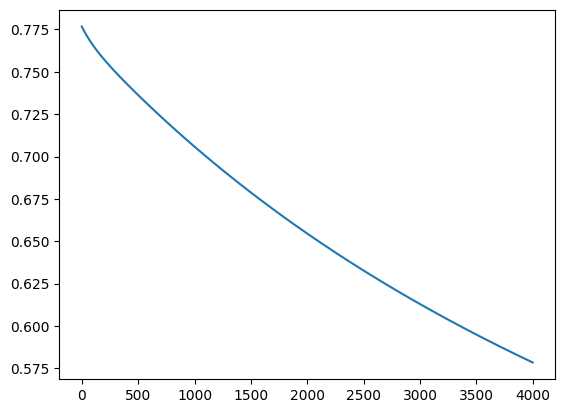

In [ ]:
plt.plot(error_hist)

In [ ]:
x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
x_test.shape

(275, 5)

In [ ]:
y_hat = logistic_regression(x_test , w)
accuracy(y_test , y_hat)

0.6981818181818182

In [ ]:
 y_hat[0:5], y_test[0:5]

(array([1, 1, 0, 1, 0]),
       
 989  1
 682  1
 3    0
 739  1
 291  0)

In [ ]:
#bakhshe akhar
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = file2[["price1" ,"price2" , "price3" , "price4"]].values
y = file2[["price5"]].values
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [ ]:
model = LogisticRegression(random_state = 93, solver='sag', max_iter=200)
model.fit(X , y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200, random_state=93, solver='sag')

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
model.score(x_test , y_test)

0.9745454545454545

In [ ]:
model.score(x_train , y_train)

0.9708029197080292

In [ ]:
y = pd.DataFrame(y , columns = [""])
y.value_counts()

0    761
1    610
dtype: int64

In [ ]:
#hal kardan ba rafee adam taadol


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = x_res_undersampling
y = y_res_undersampling
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [ ]:
model = LogisticRegression()
model.fit(X , y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_hat = model.predict(x_test)
model.score(x_test , y_test)

1.0

In [ ]:
model.score(x_train , y_train)

0.9918032786885246

In [ ]:
 from sklearn.metrics import accuracy_score
 score = accuracy_score(y_test, y_hat)
 score

1.0